# Time Series Analysis Examples
In this notebook we will be transforming and exploring time-series data from Onboard API. Make sure to run the following chunk of code first in order to install it.

How to query time-series from data points, process and visually explore them. This notebook is outlined in several YouTube videos that discuss:
- how [to load and filter time-series data](https://youtu.be/KDThdyes8kc) from sensors
- [resample and transform time-series data](https://youtu.be/VlQNGwiSSKM)
- and [create heat maps and boxplots of data](https://youtu.be/QMr0y9LOlr8) for exploration

In [1]:
import pandas as pd
from onboard.client import RtemClient

# Create the client

For this notebook, you need to use the API Key with acces to the general scope and building:read scope. Let's create the client:

In [2]:
api_key = 'ob-p-_KnPccpVFOwKvS5u_SpKixHjKKq6H1JvrzwjxISOfPiNKKZ56_EeE5ORVJOGGtx0d_k'

In [3]:
client = RtemClient(api_key=api_key)

# Load & filter data

We will be using the metadata file we obtained from Onboard API in the previous notebook. Of course you can query these points again, but let's learn how to load and filter the data using *pandas*:

In [4]:
metadata = pd.read_csv("./rtem_all_points_metadata.csv")

Let's check the data types:

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44390 entries, 0 to 44389
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_point          44390 non-null  int64  
 1   building_id       44390 non-null  int64  
 2   last_updated      44342 non-null  float64
 3   first_updated     44342 non-null  float64
 4   device            0 non-null      float64
 5   objectId          0 non-null      float64
 6   name_point        14658 non-null  object 
 7   description       31843 non-null  object 
 8   units             31687 non-null  object 
 9   tagged_units      14654 non-null  object 
 10  raw_unit_id       44390 non-null  int64  
 11  value             44274 non-null  object 
 12  type              44390 non-null  object 
 13  point_type_id     44390 non-null  int64  
 14  measurement_id    44390 non-null  int64  
 15  datasource_hash   44390 non-null  object 
 16  topic             44390 non-null  object

In [6]:
metadata.head()

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
0,310029,441,1.560571e+12,1.550542e+12,NaN,NaN,245 E 149th St. Boiler-1 Fault Code,NaN,?,?,...,18,b115b5053493748f7076ad09f69c4456,nyserda+0000088737+boiler-1+245 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
1,310009,441,1.560485e+12,1.550701e+12,NaN,NaN,225 E 149th St. Boiler-1 Exhaust Temp,NaN,F,f,...,1,4a1a11502acee3078352da312c40c262,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
2,310010,441,1.560571e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 Fault Code,NaN,?,?,...,18,55882633fe8fb5aac7dac643c99b1af5,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
3,310011,441,1.560485e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 FFWD Temp,NaN,?,?,...,18,831a8df09b848f53e807fa0204c45eaa,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
4,310012,441,1.560485e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 Fire Rate In,NaN,?,?,...,18,aa147c829c7ed55b6e93cdbbb8b43d55,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"


We have a lot of points here:

In [7]:
len(metadata.id_point)

44390

Let's filter out only the Zone Temperature sensors -that's the `type_id` 77, you can confirm this querying the ontology data, like we did in the previous notebook ;)- and that are Fan Coil Units:

In [8]:
boiler_data = metadata[(metadata.equip_type_name == "Boiler")]
pump_data = metadata[(metadata.equip_type_name == "Pump")]
hws_data = metadata[(metadata.equip_type_name == "Hot Water Plant")]

In [9]:
ahu_data = metadata[(metadata.equip_type_name == "Air Handling Unit")]

In [10]:
ahu_data['equip_id'].unique()

array([18092, 18093, 18094, ..., 22747, 32352, 32353], dtype=int64)

In [11]:
"Supply Air Static Pressure" in metadata.type

False

In [32]:
## Supply Air Static Pressure

In [25]:
SASP_mat_data = metadata[(metadata.type == "Supply Air Static Pressure")]
SASP_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1944,210913,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,3RD FL CSC_Supply Air Press,psi,NaN,...,37,92bb7920c5e6ecbfcd63b8fec211cac0,nyserda+0000080324+csc3+3RD FL CSC_Supply Air ...,20109,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1962,210935,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,4TH FL CSC_Supply Air Press,psi,NaN,...,37,a3b228fb459baff76cf50b769d1531f7,nyserda+0000080324+csc4+4TH FL CSC_Supply Air ...,20110,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1986,210958,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,5TH FL CSC_Supply Air Press,psi,NaN,...,37,59d93e0fabe3788b9cf6d34f9b7a0941,nyserda+0000080324+csc5+5TH FL CSC_Supply Air ...,20111,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2048,211015,271,1.550897e+12,1.527826e+12,NaN,NaN,NaN,1 RTU-1 AUDITORIUM_Supply Air Pressure,psi,NaN,...,37,76747cd91c975bfcd60cffde774aaaf6,nyserda+0000080324+rtu1+1 RTU-1 AUDITORIUM_Sup...,20116,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac', 'rtu']"
2069,211038,271,1.550897e+12,1.527826e+12,NaN,NaN,NaN,RTU-2 MAIN OFFICE 1st Floor_Supply Air Pressure,psi,NaN,...,37,584bb57ba4f0cda7c88dcf872e20a5b5,nyserda+0000080324+rtu2+RTU-2 MAIN OFFICE 1st ...,20117,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac', 'rtu']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43021,230363,394,1.546318e+12,1.514783e+12,NaN,NaN,NaN,HVAC F20 SStatic,psi,NaN,...,37,30ab724340aece6fb33bc9d3ff6ba2d2,nyserda+0000080880+fan20-supply+HVAC F20 SStatic,22675,394,80880,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
43768,228171,383,1.528170e+12,1.526875e+12,NaN,NaN,NaN,AHU-1 (COOLING COIL #2)_Supply Air Press,psi,NaN,...,37,ab0cfc89947e42494a0fa93a1ee2e5ab,nyserda+0000079528+ahu1+AHU-1 (COOLING COIL #2...,22394,383,79528,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
43774,228119,383,1.528170e+12,1.501560e+12,NaN,NaN,NaN,AHU-1 (COOLING COIL #1)_Supply Air Press,psi,NaN,...,37,cb1a4beab5024baa3d7c356e0ca9af56,nyserda+0000079528+ahu1+AHU-1 (COOLING COIL #1...,22394,383,79528,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44309,231057,398,1.577768e+12,1.571890e+12,NaN,NaN,NaN,AHU_26_02_Duct Static Pressure Active,psi,NaN,...,37,e8bc6334d71628f6b8a7f3fdad43c8c5,nyserda+0000109188+ahu26-02+AHU_26_02_Duct Sta...,22737,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [26]:
SASP_setpoint_mat_data = metadata[(metadata.type == "Supply Air Static Pressure Setpoint")]
SASP_setpoint_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1936,210914,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,3RD FL CSC_Supply Air Press Setpoint,psi,NaN,...,37,d7876de4636aac7a5f01d2073510b0b2,nyserda+0000080324+csc3+3RD FL CSC_Supply Air ...,20109,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1971,210936,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,4TH FL CSC_Supply Air Press Setpoint,psi,NaN,...,37,59f51f27a2c04afc8f77b50f20c7934a,nyserda+0000080324+csc4+4TH FL CSC_Supply Air ...,20110,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1981,210959,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,5TH FL CSC_Supply Air Press Setpoint,psi,NaN,...,37,a7c72a908a5bf891a06024bdc4beba0a,nyserda+0000080324+csc5+5TH FL CSC_Supply Air ...,20111,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2047,211016,271,1.550897e+12,1.527826e+12,NaN,NaN,NaN,1 RTU-1 AUDITORIUM_Supply Air Pressure Setpoint,psi,NaN,...,37,52f1c3143f0a1699007aeaa7fbec88fe,nyserda+0000080324+rtu1+1 RTU-1 AUDITORIUM_Sup...,20116,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac', 'rtu']"
2070,211039,271,1.550897e+12,1.527826e+12,NaN,NaN,NaN,RTU-2 MAIN OFFICE 1st Floor_Supply Air Pressur...,psi,NaN,...,37,9f4aec4fe9a657a42d3fd04689621817,nyserda+0000080324+rtu2+RTU-2 MAIN OFFICE 1st ...,20117,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac', 'rtu']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42570,229876,391,1.577768e+12,1.560782e+12,NaN,NaN,NaN,L_AH3_DA_STATIC_SP,psi,NaN,...,37,310085f0a410db7b21c90ffded76eeed,nyserda+0000123698+ahu3+L_AH3_DA_STATIC_SP,22589,391,123698,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
43761,228173,383,1.528170e+12,1.526875e+12,NaN,NaN,NaN,AHU-1 (COOLING COIL #2)_Supply Air Press Setpoint,psi,NaN,...,37,60fb2e9a441bcca621fb1a898d77fe90,nyserda+0000079528+ahu1+AHU-1 (COOLING COIL #2...,22394,383,79528,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
43764,228121,383,1.528170e+12,1.501560e+12,NaN,NaN,NaN,AHU-1 (COOLING COIL #1)_Supply Air Press Setpoint,psi,NaN,...,37,36d51770e4811c003c223b591fe7a719,nyserda+0000079528+ahu1+AHU-1 (COOLING COIL #1...,22394,383,79528,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44307,231058,398,1.577768e+12,1.571890e+12,NaN,NaN,NaN,AHU_26_02_Duct Static Pressure Setpoint Active,psi,NaN,...,37,1753147ea996f714faaf88c7838d4100,nyserda+0000109188+ahu26-02+AHU_26_02_Duct Sta...,22737,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [18]:
RASP_mat_data = metadata[(metadata.type == "Relief Air Static Pressure")]
RASP_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags


In [33]:
RASP_setpoint_mat_data = metadata[(metadata.type == "Relief Air Static Pressure Setpoint")]
RASP_setpoint_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags


In [34]:
EASP_mat_data = metadata[(metadata.type == "Exhaust Air Static Pressure")]
EASP_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
6953,359787,477,1.622519e+12,1.621011e+12,NaN,NaN,Shower_Front_Exhaust Air Static Pressure_BSL3_...,NaN,NaN,in w.c.,...,37,d911912f3368d7f729eb575a1be16dde,nyserda+0000159950+site-Sensor+Shower_Front_Ex...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6954,359786,477,1.622519e+12,1.621011e+12,NaN,NaN,Shower_Back_Exhaust Air Static Pressure_BSL3_S...,NaN,NaN,in w.c.,...,37,c6180fba02ec045b91954b65780a4d9e,nyserda+0000159950+site-Sensor+Shower_Back_Exh...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6955,359785,477,1.622519e+12,1.621011e+12,NaN,NaN,Procedure_RM_13A_Exhaust Air Static Pressure_B...,NaN,NaN,in w.c.,...,37,a498a9f33982767b55199e0722459e3e,nyserda+0000159950+site-Sensor+Procedure_RM_13...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6956,359784,477,1.622519e+12,1.621011e+12,NaN,NaN,Corridor_Exhaust Air Static Pressure_BSL3_Corr...,NaN,NaN,in w.c.,...,37,6180fc1dc15e26c68872416a673310ad,nyserda+0000159950+site-Sensor+Corridor_Exhaus...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6957,359783,477,1.622519e+12,1.621011e+12,NaN,NaN,Animal_RM_13E_Exhaust Air Static Pressure_BSL3...,NaN,NaN,in w.c.,...,37,d5aa8fc7c9a53d1cfd004a7824b70cdc,nyserda+0000159950+site-Sensor+Animal_RM_13E_E...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6958,359782,477,1.622519e+12,1.621011e+12,NaN,NaN,Animal_RM_13D_Exhaust Air Static Pressure_BSL3...,NaN,NaN,in w.c.,...,37,3ff2c18af65ff95ff3476b20e7bf5cb5,nyserda+0000159950+site-Sensor+Animal_RM_13D_E...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6959,359781,477,1.622519e+12,1.621011e+12,NaN,NaN,Animal_RM_13C_Exhaust Air Static Pressure_BSL3...,NaN,NaN,in w.c.,...,37,94eaff5ec91f6563bc011fe4e21dfbac,nyserda+0000159950+site-Sensor+Animal_RM_13C_E...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6960,359780,477,1.622519e+12,1.621011e+12,NaN,NaN,Animal_RM_13B_Exhaust Air Static Pressure_BSL3...,NaN,NaN,in w.c.,...,37,58e24146c6e528ef7c080bae75e0ff83,nyserda+0000159950+site-Sensor+Animal_RM_13B_E...,31798,477,159950,SITE,Site Sensors,NaN,['site']
6961,359779,477,1.622519e+12,1.621011e+12,NaN,NaN,Airlock 15_Exhaust Air Static Pressure_BSL3_Ai...,NaN,NaN,in w.c.,...,37,4a086d64c22b4372e538343fe77b655e,nyserda+0000159950+site-Sensor+Airlock 15_Exha...,31798,477,159950,SITE,Site Sensors,NaN,['site']
7009,358422,477,1.622519e+12,1.594786e+12,NaN,NaN,GX-M1-3 Exhaust Static Pressure_GM13SD,NaN,NaN,in w.c.,...,37,00efb999bfbdd21fd28db06a378a4572,nyserda+0000159950+site-Sensor+GX-M1-3 Exhaust...,31798,477,159950,SITE,Site Sensors,NaN,['site']


In [35]:
EASPS_mat_data = metadata[(metadata.type == "Exhaust Air Static Pressure Setpoint")]
EASPS_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
7008,358423,477,1.622519e+12,1.594786e+12,NaN,NaN,GX-M1-3 Exhaust Static Pressure Setpoint_GM13DS,NaN,NaN,in w.c.,...,37,7a9e09eef99abebb0a733480388dc6ec,nyserda+0000159950+site-Sensor+GX-M1-3 Exhaust...,31798,477,159950,SITE,Site Sensors,NaN,['site']


In [29]:
DSP_mat_data = metadata[(metadata.type == "Duct Static Pressure")]
DSP_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
36234,414694,311,1.614626e+12,1.599712e+12,NaN,NaN,AC-20_duct_sp_1_7,NaN,NaN,in w.c.,...,37,35c02370349a3de233e7874f3aae63cb,nyserda+0000124522+ahu-ac-20+AC-20_duct_sp_1_7,34993,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36265,216816,311,1.585627e+12,1.568212e+12,NaN,NaN,AC-22 (VAV22-7)_duct_sp_1_7,AC-22 (VAV22-7)_duct_sp_1_7,NaN,in w.c.,...,37,b75811d65e280a20a109d8c77e917812,nyserda+0000124522+ac-22+AC-22 (VAV22-7)_duct_...,34994,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36275,216834,311,1.585627e+12,1.568209e+12,NaN,NaN,AC-3_duct_sp_1_7,AC-3_duct_sp_1_7,NaN,in w.c.,...,37,753f71995678042e24ea004e7fba71af,nyserda+0000124522+ac-3+AC-3_duct_sp_1_7,34995,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36283,414666,311,1.614626e+12,1.599712e+12,NaN,NaN,AC-14 (FPT_14_10)_duct_sp_1_7,NaN,NaN,in w.c.,...,37,afc316df4b7769e6580621fc851f57de,nyserda+0000124522+ahu-ac-14+AC-14 (FPT_14_10)...,34996,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36303,414713,311,1.614626e+12,1.595872e+12,NaN,NaN,AC-23_duct_sp_1_7,NaN,NaN,in w.c.,...,37,b274d9d33df70a7e6d92986ee59def33,nyserda+0000124522+ahu-ac-23+AC-23_duct_sp_1_7,34998,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36322,414721,311,1.614626e+12,1.599712e+12,NaN,NaN,AC-6 (VAV6-8)_duct_sp_1_7,NaN,NaN,in w.c.,...,37,843cb3422eeebc7f07a22f77fa8e16c4,nyserda+0000124522+ahu-ac-6+AC-6 (VAV6-8)_duct...,34999,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [30]:
DSP_setpoint_mat_data = metadata[(metadata.type == "Duct Static Pressure Setpoint")]
DSP_setpoint_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
36233,414695,311,1.614626e+12,1.599712e+12,NaN,NaN,AC-20_duct_sp_spc_spt_2,NaN,NaN,in w.c.,...,37,6104c085580429cee737667fc8d69616,nyserda+0000124522+ahu-ac-20+AC-20_duct_sp_spc...,34993,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36264,216817,311,1.585627e+12,1.568212e+12,NaN,NaN,AC-22 (VAV22-7)_duct_sp_spc_spt_2,AC-22 (VAV22-7)_duct_sp_spc_spt_2,NaN,in w.c.,...,37,a471acfd8365656597aa85f7f73ec995,nyserda+0000124522+ac-22+AC-22 (VAV22-7)_duct_...,34994,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36274,216835,311,1.585627e+12,1.568209e+12,NaN,NaN,AC-3_duct_sp_spc_spt_2,AC-3_duct_sp_spc_spt_2,NaN,in w.c.,...,37,6ec6dd45304798d1e92806e6d3739887,nyserda+0000124522+ac-3+AC-3_duct_sp_spc_spt_2,34995,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36282,414667,311,1.614626e+12,1.599712e+12,NaN,NaN,AC-14 (FPT_14_10)_duct_sp_spc_spt_2,NaN,NaN,in w.c.,...,37,95f40539e00660a6afc9d584ab15ac3a,nyserda+0000124522+ahu-ac-14+AC-14 (FPT_14_10)...,34996,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36302,414714,311,1.614626e+12,1.595872e+12,NaN,NaN,AC-23_duct_sp_spc_spt_2,NaN,NaN,in w.c.,...,37,a1a39bec5c4f1ff2620d4158910c888d,nyserda+0000124522+ahu-ac-23+AC-23_duct_sp_spc...,34998,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
36321,414722,311,1.614626e+12,1.591916e+12,NaN,NaN,AC-6 (VAV6-8)_duct_sp_spc_spt_2,NaN,NaN,in w.c.,...,37,a4b02ddedac49f451ac4507755d9ba82,nyserda+0000124522+ahu-ac-6+AC-6 (VAV6-8)_duct...,34999,311,124522,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [20]:
ZSP_mat_data = metadata[(metadata.type == "Zone Static Pressure")]
ZSP_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
3927,283272,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP1 SpaceS...,NaN,psi,psi,...,37,b601d7b3b2b918c0cfa6a328b8ceb026,nyserda+000076513+heatPump1+480 W 42nd St - Si...,26954,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
3937,283271,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP1 SpaceS...,NaN,psi,psi,...,37,17fee3008cdcdcddf62975b35f823d3c,nyserda+000076513+heatPump1+480 W 42nd St - Si...,26954,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
3970,283302,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP2 SpaceS...,NaN,psi,psi,...,37,ade83259b2fa9025824e6fb7fd5e0e48,nyserda+000076513+heatPump2+480 W 42nd St - Si...,26955,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
3971,283303,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP2 SpaceS...,NaN,psi,psi,...,37,52328573e3e06f2371a80d6aa9f71518,nyserda+000076513+heatPump2+480 W 42nd St - Si...,26955,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
3982,283326,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP3 SpaceS...,NaN,psi,psi,...,37,53bb77238d8b570ad6a3711994b20a80,nyserda+000076513+heatPump3+480 W 42nd St - Si...,26956,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31430,203964,201,1.554090e+12,1.526061e+12,NaN,NaN,NaN,AHU - 3 Aerobics_Space Press: Active,psi,NaN,...,37,745d0e4eff0c62155f2848ef73400eb1,nyserda+0000096582+ahu3+AHU - 3 Aerobics_Space...,19024,201,96582,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
31443,204010,201,1.554090e+12,1.526061e+12,NaN,NaN,NaN,AHU - 4 Fitness_Space Press: Active,psi,NaN,...,37,0c607d989a25c73491345778fa5c07ad,nyserda+0000096582+ahu4+AHU - 4 Fitness_Space ...,19025,201,96582,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
31597,204158,202,1.554090e+12,1.522555e+12,NaN,NaN,NaN,AHU-1 Gym_Space Pressure: Active,psi,NaN,...,37,e3b2e698b1b946e515928a170398de36,nyserda+0000096581+ahu1+AHU-1 Gym_Space Pressu...,19030,202,96581,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
41022,230563,396,1.543640e+12,1.514783e+12,NaN,NaN,NaN,UC600-AHU-01_Space Press: Active,psi,NaN,...,37,4459c946c98a7be6d5c31414285005c0,nyserda+0000091480+ahu1+UC600-AHU-01_Space Pre...,22695,396,91480,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [28]:
ZSP_setpoint_mat_data = metadata[(metadata.type == "Zone Static Pressure Setpoint")]
ZSP_setpoint_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
3936,283273,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP1 SpaceS...,NaN,psi,psi,...,37,d08873262e94fa7c18924b4d2015e5ff,nyserda+000076513+heatPump1+480 W 42nd St - Si...,26954,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
3972,283304,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP2 SpaceS...,NaN,psi,psi,...,37,a156714aae78a0ad2c6487224a8633d3,nyserda+000076513+heatPump2+480 W 42nd St - Si...,26955,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
3998,283327,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP3 SpaceS...,NaN,psi,psi,...,37,85fc063923bd33560be1cf3e1c0a0c55,nyserda+000076513+heatPump3+480 W 42nd St - Si...,26956,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
4013,283357,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP4 SpaceS...,NaN,psi,psi,...,37,8d483893b86677c696d18c7ebcf3cfef,nyserda+000076513+heatPump4+480 W 42nd St - Si...,26957,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
4061,283409,426,1.606798e+12,1.512104e+12,NaN,NaN,480 W 42nd St - Signature Theatre WSHP6 SpaceS...,NaN,psi,psi,...,37,aaae65b4b407c33b7f74b55d67497a7e,nyserda+000076513+heatPump6+480 W 42nd St - Si...,26959,426,76513,HP,Heat Pump,NaN,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"
12723,197516,130,1.622433e+12,1.539662e+12,NaN,NaN,AC_8B_SSPSetpt,AC_8B_SSPSetpt,psi,in w.c.,...,37,d188ac99e163fba12f84d948007ac55c,nyserda+0000104698+ac8+AC_8B_SSPSetpt,33319,130,104698,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
31318,203876,201,1.554090e+12,1.526061e+12,NaN,NaN,NaN,AHU - 1 Gym_Space Press Setpoint,psi,NaN,...,37,6cd9e5b749d1142adf948de768052a35,nyserda+0000096582+ahu1+AHU - 1 Gym_Space Pres...,19022,201,96582,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
31399,203963,201,1.554090e+12,1.526061e+12,NaN,NaN,NaN,AHU - 3 Aerobics_Space Press Setpoint,psi,NaN,...,37,784e053f001e9f9b14c5347e8aaa081f,nyserda+0000096582+ahu3+AHU - 3 Aerobics_Space...,19024,201,96582,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
31457,204009,201,1.554090e+12,1.526061e+12,NaN,NaN,NaN,AHU - 4 Fitness_Space Press Setpoint,psi,NaN,...,37,73268afc22026d19636bb38f8eaab540,nyserda+0000096582+ahu4+AHU - 4 Fitness_Space ...,19025,201,96582,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
31599,204157,202,1.554090e+12,1.522555e+12,NaN,NaN,NaN,AHU-1 Gym_Space Pressure Setpoint,psi,NaN,...,37,f47a33f2e88860a27bb6170454c7c330,nyserda+0000096581+ahu1+AHU-1 Gym_Space Pressu...,19030,202,96581,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [22]:
MSSL_mat_data = metadata[(metadata.type == "Min Speed Setpoint Limit")]
MSSL_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags


In [23]:
Speed_mat_data = metadata[(metadata.type == "Speed")]
Speed_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1297,198163,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Supply Fan Speed Output,%,NaN,...,17,3b48061edf51685f710219f13b2334ee,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1346,198203,140,1.551416e+12,1.518620e+12,NaN,NaN,NaN,AH-1 Lobby_Supply Fan Speed Output,%,NaN,...,17,a19063fe383cb060cf6c431457bf4b71,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_Suppl...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1411,198253,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Supply Fan Speed Output,%,NaN,...,17,e14af2ce3b3636eae1f0da3278f377c2,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1434,198291,140,1.551416e+12,1.536592e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_Supply Fan Speed Output,%,NaN,...,17,90d4d7e8d5a1bab1cd230532013c34d9,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_S...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1778,306145,434,1.609476e+12,1.578693e+12,NaN,NaN,333 Lenox Road Penthouse Boiler Room Pump HW L...,NaN,%,%,...,17,7237578adf8e04e492d4268748b9a204,nyserda+0000129666+hotWaterPump-1+333 Lenox Ro...,28502,434,129666,PUMP,Pump,NaN,"['pump', 'hvac', 'hotWaterPump']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44112,230868,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,CT02 (PCWS)_CT02_FanSpd,%,NaN,...,17,b4a44be39529d8fbbb7d89b5f8095639,nyserda+0000109188+coolingTower2+CT02 (PCWS)_C...,22727,398,109188,CT,Cooling Tower,NaN,"['coolingTower', 'hvac']"
44132,230885,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,CT03 (PCWS)_CT03_FanSpd,%,NaN,...,17,2c957697dd5987eb93cf96a91d8cc8ea,nyserda+0000109188+coolingTower3+CT03 (PCWS)_C...,22728,398,109188,CT,Cooling Tower,NaN,"['coolingTower', 'hvac']"
44236,230985,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_SaFanSpd,%,NaN,...,17,2be95f3bf4ea703cd640b5f9d6fc7bac,nyserda+0000109188+ac25-1+AC-25-1_SaFanSpd,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44251,231015,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_SaFanSpd,%,NaN,...,17,012ecfd65fd07d3ba161712bb0849f4d,nyserda+0000109188+ac4-1+AC-4-1_SaFanSpd,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [36]:
Speed_setpoint_mat_data = metadata[(metadata.type == "Speed Setpoint")]
Speed_setpoint_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
3104,356536,470,1.635552e+12,1.604203e+12,NaN,NaN,51F.CT-51-1_Cooling Tower Fan Speed Setpoint_C...,NaN,NaN,%,...,17,eb801c23ce8fb23ce36ec22395b39868,nyserda+0000164423+coolingTowerFan-51-1+51F.CT...,31287,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'coolingTowerFan']"
3108,356539,470,1.633721e+12,1.604203e+12,NaN,NaN,51F.CT-51-2_Cooling Tower Fan Speed Setpoint_C...,NaN,NaN,%,...,17,84b2674467bffd489619f669e87d7ab6,nyserda+0000164423+coolingTowerFan-51-2+51F.CT...,31288,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'coolingTowerFan']"
3112,356542,470,1.635552e+12,1.604203e+12,NaN,NaN,51F.CT-51-3_Cooling Tower Fan Speed Setpoint_C...,NaN,NaN,%,...,17,fe7818461f8994d7338a9ec6cb3d4611,nyserda+0000164423+coolingTowerFan-51-3+51F.CT...,31289,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'coolingTowerFan']"
3114,356545,470,1.635552e+12,1.604203e+12,NaN,NaN,51F.CT-51-4_Cooling Tower Fan Speed Setpoint_C...,NaN,NaN,%,...,17,b2e90c1d72c90f546c752e7efb65e717,nyserda+0000164423+coolingTowerFan-51-4+51F.CT...,31290,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'coolingTowerFan']"
26618,344653,465,1.574203e+12,1.548997e+12,NaN,NaN,CH-29-1 (CHW Primary Loop)_CH1SS,NaN,NaN,%,...,17,5341929994bfbae5300fefb1973fe1d5,nyserda+00000123771+chiller1+CH-29-1 (CHW Prim...,30513,465,123771,CH,Chiller,NaN,"['chiller', 'hvac']"
26636,344686,465,1.574203e+12,1.548997e+12,NaN,NaN,CH-29-2 (CHW Primary Loop)_CH2SS,NaN,NaN,%,...,17,704a49d430aca4d809ac030a9558780d,nyserda+00000123771+chiller2+CH-29-2 (CHW Prim...,30514,465,123771,CH,Chiller,NaN,"['chiller', 'hvac']"
26652,344670,465,1.574203e+12,1.548997e+12,NaN,NaN,CH-29-2_CH2SS,NaN,NaN,%,...,17,536614e54a20ac3a857ce2ec94b2092c,nyserda+00000123771+chiller2+CH-29-2_CH2SS,30514,465,123771,CH,Chiller,NaN,"['chiller', 'hvac']"
42528,229856,391,1.577768e+12,1.559938e+12,NaN,NaN,NaN,AHU_10L RF-1 (AHU_10L)_RFanSS_1,%,NaN,...,17,807e67455e5ef7e38e6d554ca6186c9d,nyserda+0000123698+ahu10-fan1-return+AHU_10L R...,22585,391,123698,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
42537,229861,391,1.577768e+12,1.559938e+12,NaN,NaN,NaN,AHU_10L SF-1 (AHU_10L)_SFanSS_1,%,NaN,...,17,cd711a5cec1de8d5eee004dcd5beec46,nyserda+0000123698+ahu10-fan1-supply+AHU_10L S...,22586,391,123698,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
42541,229866,391,1.577768e+12,1.559938e+12,NaN,NaN,NaN,AHU_10L RF-2 (AHU_10L)_RFanSS_2,%,NaN,...,17,a425e6750cc31c14ff282b09e7b9568e,nyserda+0000123698+ahu10-fan2-return+AHU_10L R...,22587,391,123698,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"


In [38]:
Speed_sensor_mat_data = metadata[(metadata.type == "Speed Sensor")]
Speed_sensor_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
3116,356556,470,1.635531e+12,1.604203e+12,NaN,NaN,AHU-01_Return Fan VFD Speed Feedback_RF01.VFD:...,NaN,NaN,%,...,17,e43ee1aee843d2d16c8ce6ff520630c5,nyserda+0000164423+returnFan-1+AHU-01_Return F...,31291,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
3121,356550,470,1.635539e+12,1.604203e+12,NaN,NaN,AHU-17_Return Fan VFD Speed Feedback_RF20MS,NaN,NaN,%,...,17,4ff50d0d6585675b630869b4fdf69e4e,nyserda+0000164423+returnFan-17+AHU-17_Return ...,31293,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
3123,356553,470,1.635538e+12,1.604203e+12,NaN,NaN,AHU-18_Return Fan VFD Speed Feedback_RF21MS,NaN,NaN,%,...,17,94b2aa1935294b86209f53abfb8ba4d8,nyserda+0000164423+returnFan-18+AHU-18_Return ...,31294,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
3126,356564,470,1.635533e+12,1.604203e+12,NaN,NaN,AHU-02_Return Fan VFD Speed Feedback_RF02.VFD:...,NaN,NaN,%,...,17,7c68490b89b64dada46d0c6e997b413e,nyserda+0000164423+returnFan-2+AHU-02_Return F...,31295,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
3128,356559,470,1.635535e+12,1.604203e+12,NaN,NaN,AHU-21_Return Fan VFD Speed Feedback_RF23MS,NaN,NaN,%,...,17,e9f44d3bf1e8418559536f4b1f6532f2,nyserda+0000164423+returnFan-21+AHU-21_Return ...,31296,470,164423,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26367,359778,486,1.606470e+12,1.590480e+12,NaN,NaN,wrdSupplyAirFanSpeedMeasurement_AHU Penthouse ...,NaN,NaN,%,...,17,3cc9c7c54430d8f9ac87fd7b2c8f8763,nyserda+0000133939+supplyFan-PSPS+wrdSupplyAir...,32151,486,133939,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
26862,359581,487,1.614592e+12,1.598602e+12,NaN,NaN,grandcentralSupplyAirFanSpeedMeasurement_8th F...,NaN,NaN,%,...,17,c976e379062a85ea3ad363069bf18671,nyserda+0000144812+returnFan-8+grandcentralSup...,32045,487,144812,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
26864,359583,487,1.614592e+12,1.598602e+12,NaN,NaN,grandcentralSupplyAirFanSpeedMeasurement_9th F...,NaN,NaN,%,...,17,46aac69a25e6c01769e402c960cb9753,nyserda+0000144812+returnFan-9+grandcentralSup...,32046,487,144812,FAN,Fan,NaN,"['fan', 'hvac', 'returnFan']"
26988,359707,487,1.614592e+12,1.598602e+12,NaN,NaN,grandcentralSupplyAirFanSpeedMeasurement_8th F...,NaN,NaN,%,...,17,b14d4a5d18354d4b7035e0d95b4f367c,nyserda+0000144812+supplyFan-8+grandcentralSup...,32087,487,144812,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"


# Querying time-series: Boiler Heating Hot Water Supply Temp

Now that we have our metadata filtered it's time to get the time-series of those points. Let's import the libraries we will be using:

In [40]:
from datetime import datetime, timezone, timedelta
import pytz
from onboard.client.models import TimeseriesQuery, PointData
from onboard.client.dataframes import points_df_from_streaming_timeseries

First, create a list with the points to query. We already filtered our dataset, so it's all the points there:

In [43]:
DSP_points = list(DSP_mat_data.id_point)
DSP_setpoint_points = list(DSP_setpoint_mat_data.id_point)

Let's inspect the datetime period we are working with; we have to convert the `first_updated` and `last_updated` from unix timestamp to a datetime (like we learned in a previous notebook).

In [45]:
DSP_mat_data.first_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).min()

Timestamp('2019-09-11 13:35:00+0000', tz='UTC')

In [46]:
DSP_mat_data.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).max()

Timestamp('2021-03-01 19:20:00+0000', tz='UTC')

Ok, 2017-2018. Let's select a year of data; we are using the [python library datetime](https://docs.python.org/3/library/datetime.html) to create datetime objects. Remember that all the data from the API is in UTC, you have to localize all your datetimes using [PyTZ](https://pythonhosted.org/pytz/) a library designed for that purpose.

In [47]:
# Select your timezone
tz = pytz.timezone('UTC')

# Select your date and time (time is optional)
start = datetime(2019,9,11,0,0,0).replace(tzinfo=tz)
end = datetime(2021,3,1,0,0,0).replace(tzinfo=tz)

print(f"from {start} to {end}")

from 2019-09-11 00:00:00+00:00 to 2021-03-01 00:00:00+00:00


And create the query with all the parameters. Here we are saying "give me the readings fron 20 january 2017 to 20 january 2018 of the points in `points`":

In [48]:
timeseries_query_DSP = TimeseriesQuery(point_ids = DSP_points, start = start, end = end)
timeseries_query_DSP_setpoint = TimeseriesQuery(point_ids = DSP_setpoint_points, start = start, end = end)

Time to get the data!

In [58]:
# Exceute query (will return and object)
query_results_DSP = client.stream_point_timeseries(timeseries_query_DSP)
query_results_DSP_setpoint = client.stream_point_timeseries(timeseries_query_DSP_setpoint)

# Convert to dataframe
data_DSP = points_df_from_streaming_timeseries(query_results_DSP)
data_DSP_setpoint = points_df_from_streaming_timeseries(query_results_DSP_setpoint)

In [59]:
data_DSP

,timestamp,414713,414721,216816,414694,216834,414666
0,2019-09-11T13:35:00Z,NaN,NaN,NaN,NaN,1.100,NaN
1,2019-09-11T13:40:00Z,NaN,NaN,NaN,NaN,1.160,NaN
2,2019-09-11T13:45:00Z,NaN,NaN,NaN,NaN,1.175,NaN
3,2019-09-11T13:50:00Z,NaN,NaN,NaN,NaN,1.440,NaN
4,2019-09-11T13:55:00Z,NaN,NaN,NaN,NaN,1.425,NaN
...,...,...,...,...,...,...,...
148782,2021-02-28T23:35:00Z,0.0,0.0,NaN,0.035,NaN,0.02
148783,2021-02-28T23:40:00Z,0.0,0.0,NaN,0.035,NaN,0.02
148784,2021-02-28T23:45:00Z,0.0,0.0,NaN,0.035,NaN,0.02
148785,2021-02-28T23:50:00Z,0.0,0.0,NaN,0.035,NaN,0.02


In [60]:
data_DSP_setpoint

,timestamp,414714,414722,216817,414695,216835,414667
0,2019-09-11T13:35:00Z,NaN,NaN,NaN,NaN,1.27938,NaN
1,2019-09-11T13:40:00Z,NaN,NaN,NaN,NaN,1.37938,NaN
2,2019-09-11T13:45:00Z,NaN,NaN,NaN,NaN,1.37938,NaN
3,2019-09-11T13:50:00Z,NaN,NaN,NaN,NaN,1.47938,NaN
4,2019-09-11T13:55:00Z,NaN,NaN,NaN,NaN,1.27500,NaN
...,...,...,...,...,...,...,...
148781,2021-02-28T23:35:00Z,1.0,0.0,NaN,1.0,NaN,1.0
148782,2021-02-28T23:40:00Z,1.0,0.0,NaN,1.0,NaN,1.0
148783,2021-02-28T23:45:00Z,1.0,0.0,NaN,1.0,NaN,1.0
148784,2021-02-28T23:50:00Z,1.0,0.0,NaN,1.0,NaN,1.0


Took some time to retreive that data, is a big dataset. Let's export the csv:

In [62]:
data_DSP.to_csv("Duct_Static_Pressure_time_series.csv", index=False)
data_DSP_setpoint.to_csv("Duct_Static_Pressure_Setpoint_time_series.csv", index=False)

# Resampling

Let's load the dataset we just exported just to learn one more trick:

In [63]:
data_DSP = pd.read_csv("./Duct_Static_Pressure_time_series.csv")
data_DSP_setpoint = pd.read_csv("./Duct_Static_Pressure_Setpoint_time_series.csv")

In [64]:
data_DSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148787 entries, 0 to 148786
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  148787 non-null  object 
 1   414713     65356 non-null   float64
 2   414721     90202 non-null   float64
 3   216816     57084 non-null   float64
 4   414694     89608 non-null   float64
 5   216834     57094 non-null   float64
 6   414666     90118 non-null   float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [65]:
data_DSP_setpoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148786 entries, 0 to 148785
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  148786 non-null  object 
 1   414714     65355 non-null   float64
 2   414722     90200 non-null   float64
 3   216817     57084 non-null   float64
 4   414695     89605 non-null   float64
 5   216835     57092 non-null   float64
 6   414667     90116 non-null   float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


The timestamp there is not a datetime object yet. We could have parsed it as date [using the parameter `parse_dates` while reading](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) the csv or we can do the following:

In [52]:
data_DSP["timestamp"] = pd.to_datetime(data_DSP['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')


In [53]:
type(data_DSP.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

See? now is a datetime object located in UTC timezone.

One important thing when working with time-series data is knowing how to resample it. Let's inspect our data:

In [54]:
data.head(10)

,timestamp,197306,197308,194193,194188,199523,199546,201534,204548,204552,209222,209234,209246,209258,222746
0,2018-02-08 00:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,NaN
1,2018-02-08 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.6,NaN
2,2018-02-08 00:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.2,NaN
3,2018-02-08 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.3,NaN
4,2018-02-08 01:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.7,NaN
5,2018-02-08 01:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.9,NaN
6,2018-02-08 01:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.7,NaN
7,2018-02-08 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.4,NaN
8,2018-02-08 02:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.9,NaN
9,2018-02-08 02:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.8,NaN


looks like readings are each 15 minutes and we have some missing gaps there. What if we want the reading each hour, getting the average value in that period? We can do that easily with the `resample` method. You have to specify the frequency ("D" means 1 Day), on which column you will be resampling ("timestamp") and the aggregation function ("mean"). For applying this function is important to have your timestamp as a datetime type, otherwise it will do it by index and won't understand the frequency.

In [55]:
data.resample('D', on="timestamp").mean()

,197306,197308,194193,194188,199523,199546,201534,204548,204552,209222,209234,209246,209258,222746
timestamp,,,,,,,,,,,,,,
2018-02-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.463830,NaN
2018-02-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.985263,NaN
2018-02-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.024468,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.080000,NaN
2018-02-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.990526,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27 00:00:00+00:00,NaN,NaN,156.481258,153.756265,79.558333,79.558333,132.984363,NaN,NaN,75.905208,76.330208,75.983333,75.494792,176.190625
2018-08-28 00:00:00+00:00,NaN,NaN,157.551360,155.229765,81.275000,81.275000,133.014425,NaN,NaN,73.672917,73.811458,72.953125,72.881250,176.242708
2018-08-29 00:00:00+00:00,NaN,NaN,158.567952,156.667831,83.931250,83.931250,133.038338,NaN,NaN,75.659375,75.918750,75.409375,74.364583,176.731250


And you can do it with the frequency you want. Let's try 1 Hour ("H" is 1 Hour):

In [56]:
data.resample('H', on="timestamp").mean()

,197306,197308,194193,194188,199523,199546,201534,204548,204552,209222,209234,209246,209258,222746
timestamp,,,,,,,,,,,,,,
2018-02-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.600,NaN
2018-02-08 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.650,NaN
2018-02-08 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.700,NaN
2018-02-08 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.275,NaN
2018-02-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00+00:00,NaN,NaN,158.495331,153.294147,80.275,80.275,132.099331,NaN,NaN,73.100,73.475,73.00,73.000,156.425
2018-08-31 20:00:00+00:00,NaN,NaN,158.837814,152.552265,80.200,80.200,121.936161,NaN,NaN,73.125,73.500,73.00,73.050,159.600
2018-08-31 21:00:00+00:00,NaN,NaN,162.131569,155.718674,80.200,80.200,142.263313,NaN,NaN,73.200,73.500,73.00,73.000,162.550


That weird "T" -that means "minutes"- is an [offset alias. You can check all of them out here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

# Plotting

## Lineplots

We are going to explore our sensors data with some simple lineplots. We are going to use [*Seaborn*](https://seaborn.pydata.org/) which works on [*Matplotlib*](https://matplotlib.org/stable/users/index.html). Let's import them:

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is for the visual stype, I like "ggplot"
plt.style.use('ggplot')

# This for the figure size
plt.rcParams["figure.figsize"] = (20,9)

Let's plot the raw data of our sensors:

In [55]:
# These are the sensors, one per column (first one is the timestamp)
cols = data_DSP.columns[1:]
cols

Index([414713, 414721, 216816, 414694, 216834, 414666], dtype='object')

In [57]:
for col in cols:
    plt.figure()
    sns.lineplot(data=data_DSP, x="timestamp", y=col)


KeyboardInterrupt



Error in callback <function flush_figures at 0x00000246BD70BCA0> (for post_execute):



KeyboardInterrupt



We have a huge gap with no data and the rest it's noisy and difficult to see. Let's filter data from september 1st 2017:

In [45]:
data = data[data.timestamp >= "2017-09-01"]

One useful technique to deal with noisy data is to resample it by hour (or a longer time frequency) aggregating by the mean: this way we can visualize the hourly/daily behaviour more smoothed.

But first, let's go deeper into our `timestamp` column. This is a datetime column, meaning that we have some functions to handle the dates better. With [this pandas method](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) we can access our date: we can get the date, the weekday, the hour, the seconds, the minutes; all the information in our date can be obtained.

Let's try an example. This is our raw timestamp:

In [46]:
data.timestamp

5715    2017-09-01 04:00:00+00:00
5716    2017-09-01 04:15:00+00:00
5717    2017-09-01 04:30:00+00:00
5718    2017-09-01 04:45:00+00:00
5719    2017-09-01 05:00:00+00:00
                   ...           
19222   2018-01-19 22:45:00+00:00
19223   2018-01-19 23:00:00+00:00
19224   2018-01-19 23:15:00+00:00
19225   2018-01-19 23:30:00+00:00
19226   2018-01-19 23:45:00+00:00
Name: timestamp, Length: 13512, dtype: datetime64[ns, UTC]

We can get the date:

In [47]:
data.timestamp.dt.date

5715     2017-09-01
5716     2017-09-01
5717     2017-09-01
5718     2017-09-01
5719     2017-09-01
            ...    
19222    2018-01-19
19223    2018-01-19
19224    2018-01-19
19225    2018-01-19
19226    2018-01-19
Name: timestamp, Length: 13512, dtype: object

Even the he day of the week (with Monday=0, Sunday=6)

In [48]:
data.timestamp.dt.weekday

5715     4
5716     4
5717     4
5718     4
5719     4
        ..
19222    4
19223    4
19224    4
19225    4
19226    4
Name: timestamp, Length: 13512, dtype: int64

The hour

In [49]:
data.timestamp.dt.hour

5715      4
5716      4
5717      4
5718      4
5719      5
         ..
19222    22
19223    23
19224    23
19225    23
19226    23
Name: timestamp, Length: 13512, dtype: int64

Or the minutes

In [50]:
data.timestamp.dt.minute

5715      0
5716     15
5717     30
5718     45
5719      0
         ..
19222    45
19223     0
19224    15
19225    30
19226    45
Name: timestamp, Length: 13512, dtype: int64

Pretty simple! You have all the datetime information handy.

Now let's smooth the data to plot it!

In [51]:
data_hour = data.resample('1H', on="timestamp").mean()
data_hour.head()

,283207,283209,283211,283214,283216,191413,191426,191439,191452,191465,...,196519,196536,196551,196567,196584,196602,196620,196638,196654,196674
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.275,71.250,71.225,79.000,70.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.375,71.350,71.350,79.000,70.075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.550,71.550,71.550,79.150,70.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.500,71.525,71.525,79.200,70.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.675,71.675,71.675,79.175,70.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And we have the mean temperature by hour! Plotting it is simple with this data set:

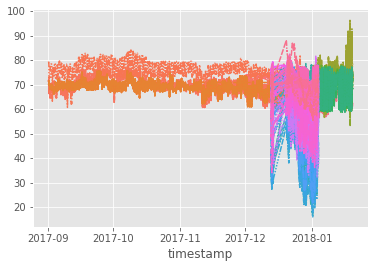

In [52]:
fig = sns.lineplot(data=data_hour)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

Let's do it again but daily:

In [53]:
data_day = data.resample('24H', on="timestamp").mean()
data_day.head()

,283207,283209,283211,283214,283216,191413,191426,191439,191452,191465,...,196519,196536,196551,196567,196584,196602,196620,196638,196654,196674
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,68.651250,68.648750,68.643750,75.121250,69.893750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,68.393750,68.384375,68.378125,76.897917,69.031250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,69.672917,69.671875,69.673958,74.426042,68.222917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,67.663542,67.661458,67.661458,75.207292,68.958333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,69.519792,69.509375,69.519792,75.462500,69.866667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


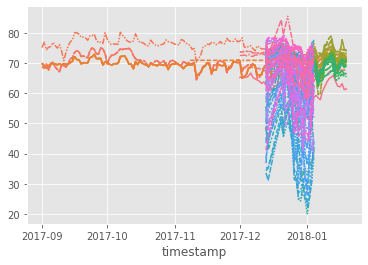

In [54]:
sns.lineplot(data=data_day)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

## Heatmaps

Lineplots are easy but still pretty diffcult to visualize. Instead, we can use [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), it's also really easy. Remember you can transpose your data to change the axis, like this:

In [55]:
data_hour.T

timestamp,2017-09-01 04:00:00+00:00,2017-09-01 05:00:00+00:00,2017-09-01 06:00:00+00:00,2017-09-01 07:00:00+00:00,2017-09-01 08:00:00+00:00,2017-09-01 09:00:00+00:00,2017-09-01 10:00:00+00:00,2017-09-01 11:00:00+00:00,2017-09-01 12:00:00+00:00,2017-09-01 13:00:00+00:00,...,2018-01-19 14:00:00+00:00,2018-01-19 15:00:00+00:00,2018-01-19 16:00:00+00:00,2018-01-19 17:00:00+00:00,2018-01-19 18:00:00+00:00,2018-01-19 19:00:00+00:00,2018-01-19 20:00:00+00:00,2018-01-19 21:00:00+00:00,2018-01-19 22:00:00+00:00,2018-01-19 23:00:00+00:00
283207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0825,62.1925,62.9100,62.2325,61.2925,61.1775,61.1975,61.1350,61.8475,62.2625
283209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.7475,68.2175,68.2925,68.4200,68.3125,68.1775,68.1575,68.2050,68.1075,67.9150
283211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.9100,72.3250,72.1400,72.4075,72.7400,72.7675,72.9150,73.0850,72.5725,72.3800
283214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.9525,72.1850,71.8925,72.5950,72.3850,72.6175,73.1250,72.8975,72.5175,72.2425
283216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.1025,72.2675,71.8575,71.7125,71.9125,72.0425,71.8800,71.8775,71.9100,72.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And super-easy to plot:

<AxesSubplot:xlabel='timestamp'>

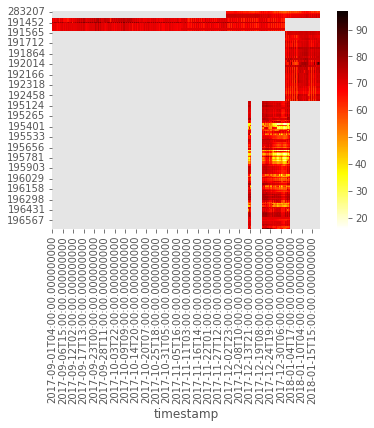

In [56]:
sns.heatmap(data_hour.T, cmap="hot_r")

<AxesSubplot:xlabel='timestamp'>

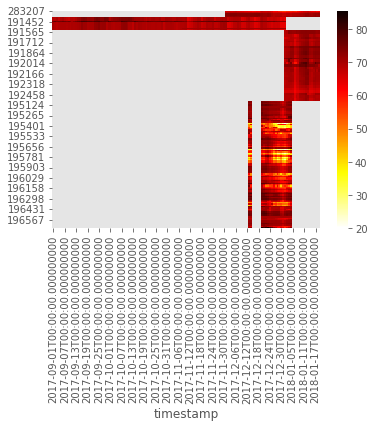

In [57]:
sns.heatmap(data_day.T, cmap="hot_r")

With this kind of plot is pretty evident where we have gaps with no-readings.

# Summary stats

Usually is useful to get some summary stats from our data. Fortunately, pandas has a simple method to obtain them:

In [58]:
data.describe()

,283207,283209,283211,283214,283216,191413,191426,191439,191452,191465,...,196519,196536,196551,196567,196584,196602,196620,196638,196654,196674
count,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,...,1518.000000,1518.0,1515.000000,1515.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1519.000000
mean,62.597096,66.685291,71.442550,71.427699,71.541416,69.874906,69.875779,69.875317,76.198296,68.980171,...,74.648024,70.0,67.324356,68.033201,70.689262,70.703887,72.494005,70.989723,64.281555,71.949045
std,3.165868,1.741411,2.097606,2.205529,1.511267,3.436551,3.435506,3.435482,3.185632,2.602234,...,2.287271,0.0,2.627676,1.711771,1.492092,1.568331,1.643885,1.895229,4.185819,8.590327
min,55.040000,61.420000,65.840000,65.200000,66.820000,60.100000,60.100000,60.100000,60.500000,60.600000,...,69.300000,70.0,62.400000,64.900000,65.300000,65.300000,69.100000,66.200000,56.900000,54.800000
25%,60.337500,65.350000,69.690000,69.617500,70.770000,68.100000,68.100000,68.100000,73.900000,67.700000,...,72.800000,70.0,64.800000,66.400000,70.500000,70.500000,71.300000,70.125000,61.400000,65.200000
50%,63.170000,67.050000,71.810000,71.805000,71.810000,70.400000,70.400000,70.400000,75.600000,69.400000,...,75.400000,70.0,67.700000,68.600000,71.300000,71.400000,72.100000,71.400000,63.550000,71.000000
75%,65.090000,68.090000,73.430000,73.420000,72.500000,71.900000,71.900000,71.900000,78.900000,70.700000,...,76.200000,70.0,69.500000,68.900000,71.700000,71.700000,73.600000,71.700000,67.000000,80.100000
max,70.120000,70.150000,74.580000,74.910000,75.260000,78.600000,78.600000,78.600000,84.400000,76.600000,...,80.400000,70.0,71.700000,75.000000,74.500000,74.200000,76.400000,82.900000,78.900000,88.000000


These stats are usually visualizes in boxplot and histograms; these two plots can be easily obtained with the plotting libraries we are using. But first I suggest processing a little the dataframe to be able to plot all sensors in the same figure. We are using the pandas method [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). We have the data in this way right now:

In [59]:
data.head()

,timestamp,283207,283209,283211,283214,283216,191413,191426,191439,191452,...,196519,196536,196551,196567,196584,196602,196620,196638,196654,196674
5715,2017-09-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.0,70.9,70.9,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5716,2017-09-01 04:15:00+00:00,NaN,NaN,NaN,NaN,NaN,71.1,71.1,71.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5717,2017-09-01 04:30:00+00:00,NaN,NaN,NaN,NaN,NaN,71.5,71.5,71.5,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5718,2017-09-01 04:45:00+00:00,NaN,NaN,NaN,NaN,NaN,71.5,71.5,71.5,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5719,2017-09-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,71.4,71.3,71.3,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we use the `melt` method we can convert our columns in rows, creating a new one that indicates which column it was. Is easier seeing the results, check it out:

In [60]:
melted_data = data.melt(id_vars="timestamp", var_name="sensor", value_name="temperature")
melted_data

,timestamp,sensor,temperature
0,2017-09-01 04:00:00+00:00,283207,NaN
1,2017-09-01 04:15:00+00:00,283207,NaN
2,2017-09-01 04:30:00+00:00,283207,NaN
3,2017-09-01 04:45:00+00:00,283207,NaN
4,2017-09-01 05:00:00+00:00,283207,NaN
...,...,...,...
2256499,2018-01-19 22:45:00+00:00,196674,NaN
2256500,2018-01-19 23:00:00+00:00,196674,NaN
2256501,2018-01-19 23:15:00+00:00,196674,NaN
2256502,2018-01-19 23:30:00+00:00,196674,NaN


And now that we have the data in this shape, is easy to get a boxplot:

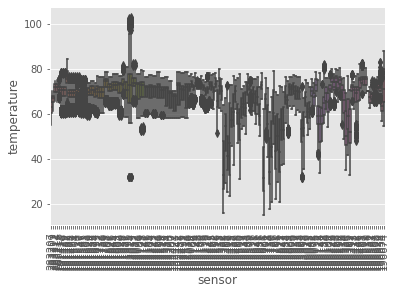

In [61]:
fig = sns.boxplot(y="temperature", x="sensor", data=melted_data)
labels = plt.xticks(rotation=90)

We can also plot an histogram, but with this number of sensors a boxplot is cleaner:

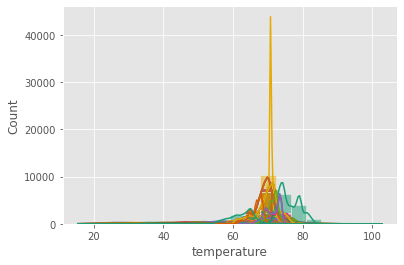

In [62]:
fig = sns.histplot(data=melted_data, x="temperature", hue="sensor", bins=20, kde=True, palette="Dark2")

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

Finally, let's create a dataset with the stats. 

In [63]:
stats_data = data.describe()
stats_data

,283207,283209,283211,283214,283216,191413,191426,191439,191452,191465,...,196519,196536,196551,196567,196584,196602,196620,196638,196654,196674
count,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,...,1518.000000,1518.0,1515.000000,1515.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1519.000000
mean,62.597096,66.685291,71.442550,71.427699,71.541416,69.874906,69.875779,69.875317,76.198296,68.980171,...,74.648024,70.0,67.324356,68.033201,70.689262,70.703887,72.494005,70.989723,64.281555,71.949045
std,3.165868,1.741411,2.097606,2.205529,1.511267,3.436551,3.435506,3.435482,3.185632,2.602234,...,2.287271,0.0,2.627676,1.711771,1.492092,1.568331,1.643885,1.895229,4.185819,8.590327
min,55.040000,61.420000,65.840000,65.200000,66.820000,60.100000,60.100000,60.100000,60.500000,60.600000,...,69.300000,70.0,62.400000,64.900000,65.300000,65.300000,69.100000,66.200000,56.900000,54.800000
25%,60.337500,65.350000,69.690000,69.617500,70.770000,68.100000,68.100000,68.100000,73.900000,67.700000,...,72.800000,70.0,64.800000,66.400000,70.500000,70.500000,71.300000,70.125000,61.400000,65.200000
50%,63.170000,67.050000,71.810000,71.805000,71.810000,70.400000,70.400000,70.400000,75.600000,69.400000,...,75.400000,70.0,67.700000,68.600000,71.300000,71.400000,72.100000,71.400000,63.550000,71.000000
75%,65.090000,68.090000,73.430000,73.420000,72.500000,71.900000,71.900000,71.900000,78.900000,70.700000,...,76.200000,70.0,69.500000,68.900000,71.700000,71.700000,73.600000,71.700000,67.000000,80.100000
max,70.120000,70.150000,74.580000,74.910000,75.260000,78.600000,78.600000,78.600000,84.400000,76.600000,...,80.400000,70.0,71.700000,75.000000,74.500000,74.200000,76.400000,82.900000,78.900000,88.000000


We are transposing it and reseting the index to keep a column with the point id (was the name of the column):

In [64]:
stats_data = stats_data.T.reset_index().rename(columns={"index":"id_point"})
stats_data

,id_point,count,mean,std,min,25%,50%,75%,max
0,283207,4780.0,62.597096,3.165868,55.04,60.3375,63.170,65.09,70.12
1,283209,4780.0,66.685291,1.741411,61.42,65.3500,67.050,68.09,70.15
2,283211,4780.0,71.442550,2.097606,65.84,69.6900,71.810,73.43,74.58
3,283214,4780.0,71.427699,2.205529,65.20,69.6175,71.805,73.42,74.91
4,283216,4780.0,71.541416,1.511267,66.82,70.7700,71.810,72.50,75.26
...,...,...,...,...,...,...,...,...,...
162,196602,1518.0,70.703887,1.568331,65.30,70.5000,71.400,71.70,74.20
163,196620,1518.0,72.494005,1.643885,69.10,71.3000,72.100,73.60,76.40
164,196638,1518.0,70.989723,1.895229,66.20,70.1250,71.400,71.70,82.90
165,196654,1518.0,64.281555,4.185819,56.90,61.4000,63.550,67.00,78.90


And now let's convert the `id_point` column in our metadata set to string (is an int right now) so we are able to merge with `stats_data`:

In [65]:
metadata['id_point'] = metadata['id_point'].astype(str)

And merge!

In [66]:
stats_merged = pd.merge(stats_data, metadata, how="left", on="id_point")
stats_merged.head()

,id_point,count,mean,std,min,25%,50%,75%,max,building_id,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
0,283207,4780.0,62.597096,3.165868,55.04,60.3375,63.170,65.09,70.12,426,...,1,87113a711b107b4b443340d16ad6cceb,nyserda+000076513+fcu-hwc1+480 W 42nd St - Sig...,26941,426,76513,FCU,Fan Coil Unit,NaN,"['fcu', 'hvac']"
1,283209,4780.0,66.685291,1.741411,61.42,65.3500,67.050,68.09,70.15,426,...,1,ef26797e2fd4e462890999b64b0abc0c,nyserda+000076513+fcu-hwc2+480 W 42nd St - Sig...,26942,426,76513,FCU,Fan Coil Unit,NaN,"['fcu', 'hvac']"
2,283211,4780.0,71.442550,2.097606,65.84,69.6900,71.810,73.43,74.58,426,...,1,6ee24ebb3da96f5f9ed182374b48b2d8,nyserda+000076513+fcu-hwc3+480 W 42nd St - Sig...,26943,426,76513,FCU,Fan Coil Unit,NaN,"['fcu', 'hvac']"
3,283214,4780.0,71.427699,2.205529,65.20,69.6175,71.805,73.42,74.91,426,...,1,37b2699031cc89ff369ee3b0d5a1207c,nyserda+000076513+fcu-hwc5+480 W 42nd St - Sig...,26945,426,76513,FCU,Fan Coil Unit,NaN,"['fcu', 'hvac']"
4,283216,4780.0,71.541416,1.511267,66.82,70.7700,71.810,72.50,75.26,426,...,1,99098e67b09d26cac4610dd619b1c1bc,nyserda+000076513+fcu-hwc6+480 W 42nd St - Sig...,26946,426,76513,FCU,Fan Coil Unit,NaN,"['fcu', 'hvac']"


In [67]:
metadata.T

,3873,3876,3877,3880,3882,6125,20998,21011,21025,21038,...,39149,39155,39165,39189,39195,39214,39221,39230,39239,39254
id_point,283207,283209,283211,283214,283216,267044,191413,191426,191439,191452,...,223181,223191,223202,223221,223232,223243,223254,223265,223276,223287
building_id,426,426,426,426,426,417,101,101,101,101,...,354,354,354,354,354,354,354,354,354,354
last_updated,1606797900000.0,1606797900000.0,1606797900000.0,1579245300000.0,1606797900000.0,1625703300000.0,1546317900000.0,1546317900000.0,1546317900000.0,1546317900000.0,...,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0,1535773500000.0
first_updated,1512104400000.0,1512104400000.0,1512104400000.0,1512104400000.0,1512104400000.0,1538916300000.0,1504238400000.0,1504238400000.0,1504238400000.0,1504238400000.0,...,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0,1517461200000.0
device,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name_point,480 W 42nd St - Signature Theatre HWC1 SpcTemp...,480 W 42nd St - Signature Theatre HWC2 SpcTemp...,480 W 42nd St - Signature Theatre HWC3 SpcTemp...,480 W 42nd St - Signature Theatre HWC5 SpcTemp...,480 W 42nd St - Signature Theatre HWC6 SpcTemp...,FCUs FCU-1-1 FCU1-1SpaceTemp,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,NaN,NaN,NaN,NaN,NaN,FCUs FCU-1-1 FCU1-1SpaceTemp,FCU-1-1 Left 1st flr rear_Space Temp,FCU-1-2 Middle ist flr rear_Space Temp,FCU-1-3 Right 1st flr rear_Space Temp,FCU-2-1 Library_Space Temp,...,CUH-2 SW Vestibule_Space Temp,FCU-03 High School Main Lobby Vestibule_Space ...,FCU-3 Metal Shop_Space Temp,FCU-04 Main Lobby 7/8_Space Temp,FCU-4 Wood Shop_Space Temp,FCU-05 Lower Atrium_Space Temp,FCU-6 East Vestibule_Space Temp,FCU-07 West Middle School Wing_Space Temp,FCU-08 2nd Floor East Wing_Space Temp,FCU-09 Upper Atrium_Space Temp
units,F,F,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
tagged_units,f,f,f,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, plot! we want to visualize the mean temperature of the points, colored by the building name.

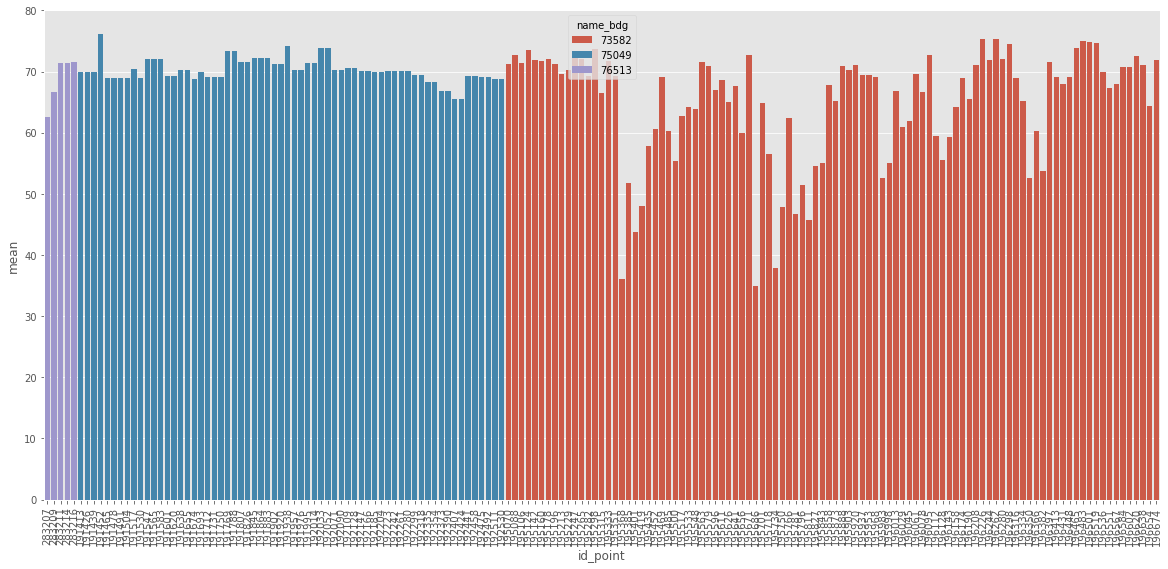

In [53]:
fig = sns.barplot(data=stats_merged, x="id_point", y="mean", hue="name_bdg", dodge=False)
labels = plt.xticks(rotation=90)